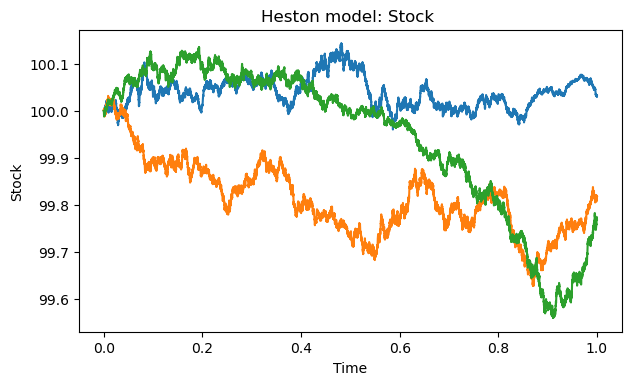

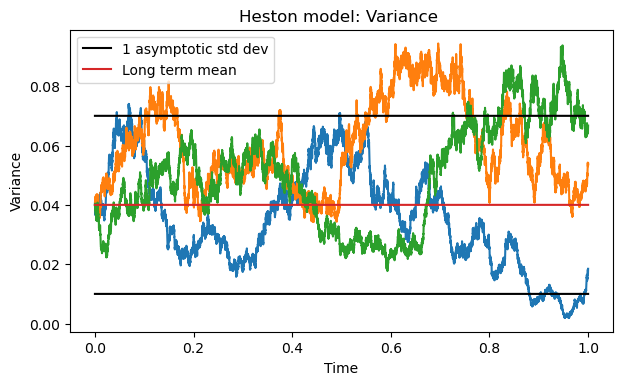

In [7]:
#!/usr/bin/python3
#Heston Stochastic Volatility Model.ipynb
#Parth Parakh
#purpose: Simulate an Heston model with Euler Maruyama 
#dS(t) = mu*S(t)*dt+ sqrt(v(t))*S(t)*dW1(t),
#where v(t), the instantaneous variance, is a CIR process:
##dv(t) = kappa*(theta-v(t))*dt + sigma*sqrt(v(t))*dW2(t)

#The stock price follows a geometric Brownian motion with a stochastic volatility. The square of the volatility 
#(the variance) follows a CIR process. 

#The parameters are:

#$\mu$ drift of the stock process
#$\kappa$ mean reversion coefficient of the variance process
#$\theta$ long term mean of the variance process
#$\sigma$ volatility coefficient of the variance process
#$\rho$ correlation between $W^1$ and $W^2$ 
#we also use 2*\kappa*\theta > \sigma^2 (Feller condition)
#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
#----------------------------------------------------------------------

#page number 145 : Tools from Stochastic Analysis for Mathematical Finance: A Gentle Introduction
np.random.seed(seed=42) 

N = 20000;              # time steps 
paths = 3;              # number of paths
T = 1;
T_vec, dt = np.linspace(0,T,N, retstep=True );
dt_sq = np.sqrt(dt);

s0 = 100          # spot price
v0 = 0.04         # spot variance

mu = 0.1;                                           # drift
rho = -0.2;                                         # correlation coefficient
kappa = 2;                                          # mean reversion coefficient
theta = 0.04;                                       # long-term variance
sigma = 0.3;                                        # Vol of Vol - Volatility of instantaneous variance
std_asy = np.sqrt( theta * sigma**2 /(2*kappa) );   # asymptotic standard deviation for the CIR process
assert(2*kappa * theta > sigma**2);                 # Feller condition

# Generate random Brownian Motion
MU = np.array([0, 0])
COV = np.matrix([[1, rho], [rho, 1]])
W = ss.multivariate_normal.rvs( mean=MU, cov=COV, size=(paths,N-1) )
W_S = W[:,:,0]   # Stock Brownian motion:     W_1
W_v = W[:,:,1]   # Variance Brownian motion:  W_2

# Initialize vectors
V = np.zeros((paths,N))
V[:,0] = v0
S = np.zeros((paths,N))
S[:,0] = s0
v = np.zeros(N)

# Generate paths
for t in range(0,N-1):
    v = V[:,t]            # variance 
    v_sq = np.sqrt(v)     # square root of variance 
    
    V[:,t+1] = V[:,t] + (kappa*(theta-v))*dt + sigma*(v_sq)*dt_sq*W_v[:,t]   
    S[:,t+1] = S[:,t] + (mu-0.5*v)*dt + v_sq*dt_sq*W_S[:,t]

plot1 = plt.figure(1,figsize=(7,4), dpi=100)
plt.plot(T_vec, S.T )
plt.title("Heston model: Stock ");
plt.xlabel("Time");
plt.ylabel("Stock")

plot2 = plt.figure(2,figsize=(7,4), dpi=100)
plt.plot(T_vec, V.T )
plt.title("Heston model: Variance ");
plt.xlabel("Time");
plt.ylabel("Variance")
plt.plot(T_vec, (theta + std_asy)*np.ones_like(T_vec), label="1 asymptotic std dev", color="black" )
plt.plot(T_vec, (theta - std_asy)*np.ones_like(T_vec), color="black" )
plt.plot(T_vec, theta*np.ones_like(T_vec), label="Long term mean" )
plt.legend(); 
plt.show()